In [14]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df_tsla = pdr.get_data_yahoo('TSLA')
df_tsla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-18,25.974001,25.178667,25.350000,25.666668,107820000.0,25.666668
2017-09-19,25.492666,24.904667,25.333332,25.006666,96778500.0,25.006666
2017-09-20,25.216667,24.738001,24.866667,24.927334,73786500.0,24.927334
2017-09-21,25.122000,24.300667,24.993334,24.431999,69273000.0,24.431999
2017-09-22,24.660000,23.392000,24.432667,23.406000,122391000.0,23.406000


## Simple Moving Average

SMA is the easiest moving average to construct. It is simply the average price over the specified period. The average is called "moving" because it is plotted on the chart bar by bar, forming a line that moves along the chart as the average value changes.

    Disavdantage: Gives equal weightage to all the data

<AxesSubplot:xlabel='Date'>

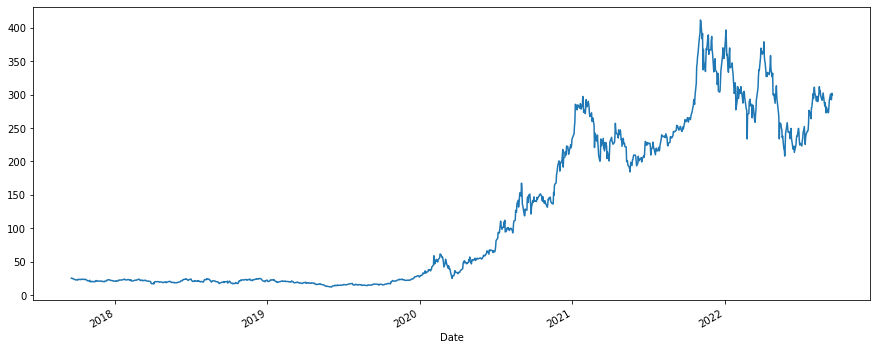

In [16]:
df_tsla['Open'].plot(figsize = (15, 6))

In [17]:
df_tsla['SMA (window 10)'] = df_tsla['Open'].rolling(window = 10, min_periods = 1).mean()

<AxesSubplot:xlabel='Date'>

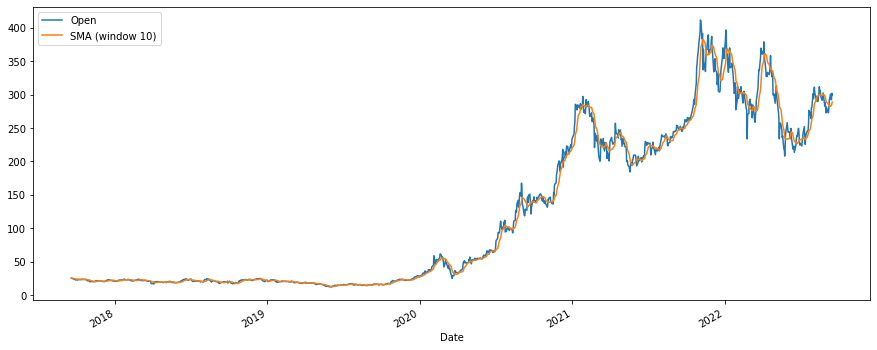

In [18]:
df_tsla[['Open','SMA (window 10)' ]].plot(figsize = (15, 6))

<AxesSubplot:xlabel='Date'>

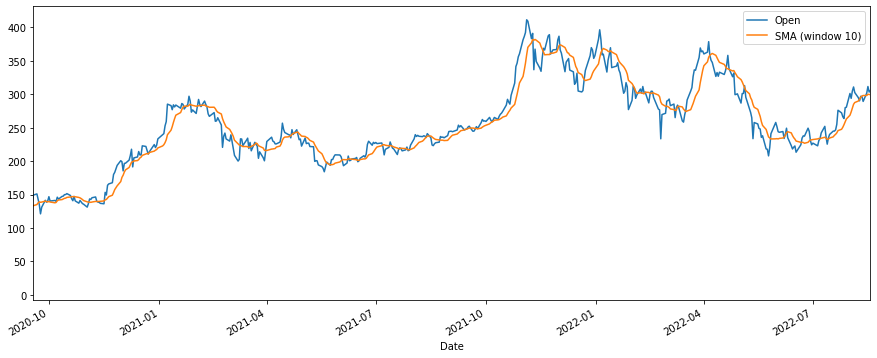

In [19]:
df_tsla[['Open','SMA (window 10)' ]].plot(figsize = (15, 6), xlim = ['2020-09-18','2022-08-18'])

In [20]:
df_tsla['SMA (window 20)'] = df_tsla['Open'].rolling(window = 20, min_periods = 1).mean()
df_tsla['SMA (window 30)'] = df_tsla['Open'].rolling(window = 30, min_periods = 1).mean()
df_tsla['SMA (window 40)'] = df_tsla['Open'].rolling(window = 40, min_periods = 1).mean()
df_tsla['SMA (window 50)'] = df_tsla['Open'].rolling(window = 50, min_periods = 1).mean()

<AxesSubplot:xlabel='Date'>

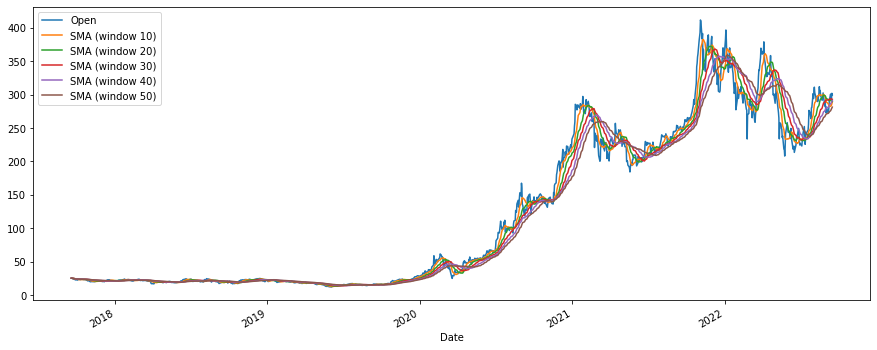

In [21]:
df_tsla[['Open','SMA (window 10)', 'SMA (window 20)','SMA (window 30)','SMA (window 40)','SMA (window 50)' ]].plot(figsize = (15, 6))

<AxesSubplot:xlabel='Date'>

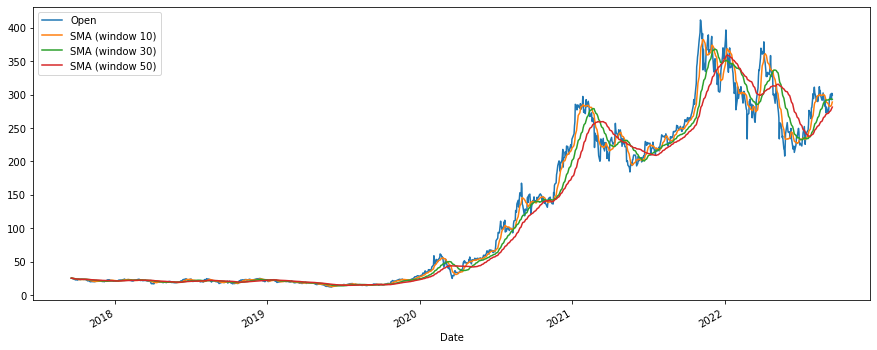

In [22]:
df_tsla[['Open','SMA (window 10)','SMA (window 30)','SMA (window 50)' ]].plot(figsize = (15, 6))

## Cummulative Moving Average

<AxesSubplot:xlabel='Date'>

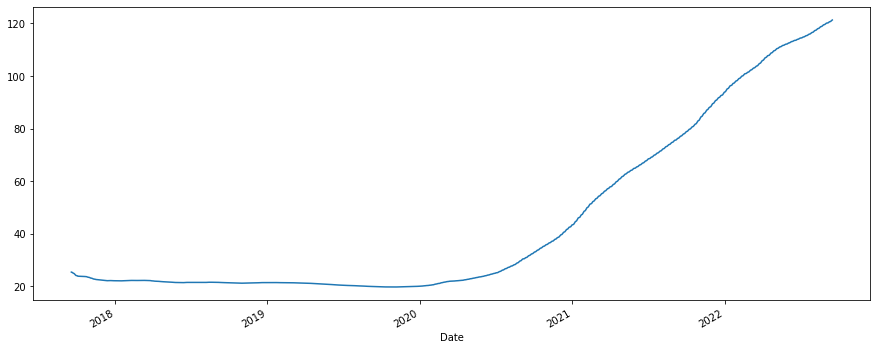

In [25]:
df_tsla['Open'].expanding().mean().plot(figsize = (15, 6))

## Exponential Moving Average

    Formula : ((Close - Prev EMA)* multiplier) + Prev EMA
    
First EMA would be just a normal average of window size items

    Multiplier: 2/ (EMA window size + 1)

In [27]:
df_tsla['EMA'] = df_tsla['Open'].ewm(alpha = 0.1, adjust = False).mean()

<AxesSubplot:xlabel='Date'>

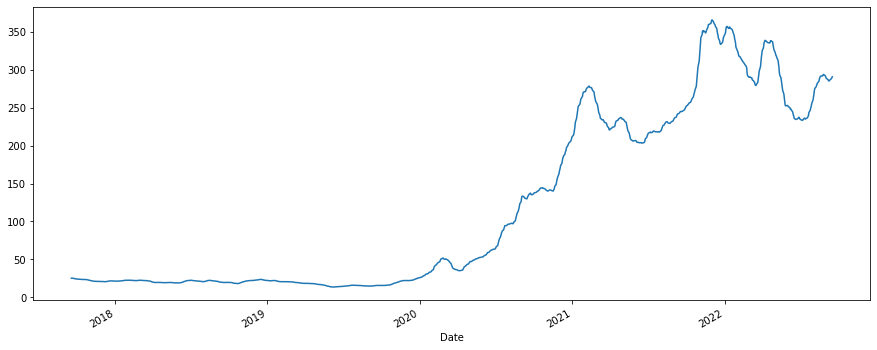

In [28]:
df_tsla['EMA'].plot(figsize = (15, 6))

<AxesSubplot:xlabel='Date'>

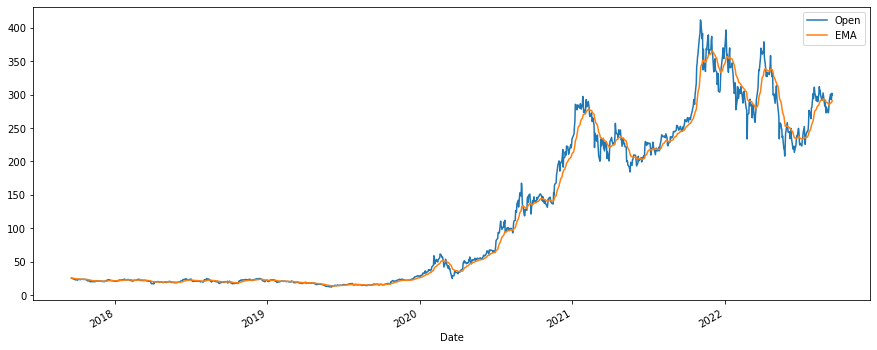

In [29]:
df_tsla[['Open','EMA']].plot(figsize = (15, 6))

<AxesSubplot:xlabel='Date'>

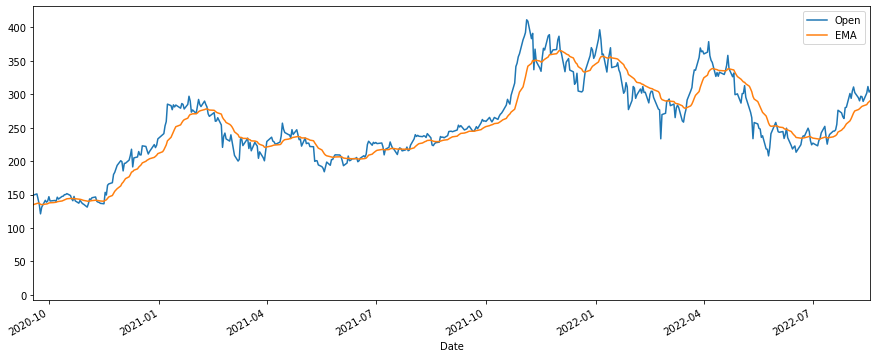

In [30]:
df_tsla[['Open','EMA']].plot(figsize = (15, 6),xlim = ['2020-09-18','2022-08-18'])

In [31]:
# df_tsla['EMA'] = df_tsla['Open'].ewm(alpha = 0.1, adjust = False).mean()
df_tsla['EMA 0.5'] = df_tsla['Open'].ewm(alpha = 0.5, adjust = False).mean()
df_tsla['EMA 0.8'] = df_tsla['Open'].ewm(alpha = 0.8, adjust = False).mean()

<AxesSubplot:xlabel='Date'>

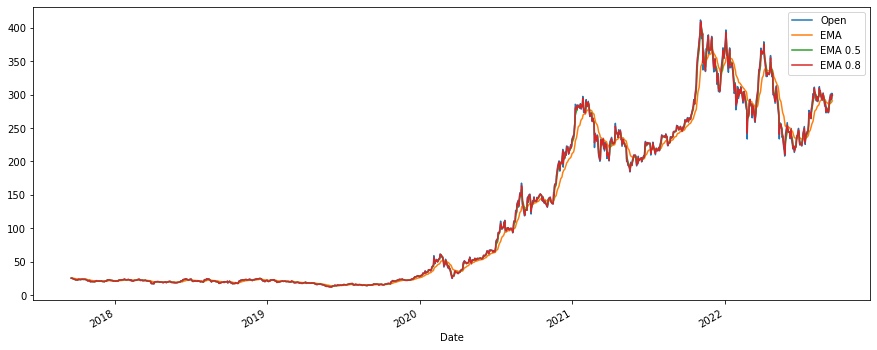

In [32]:
df_tsla[['Open','EMA','EMA 0.5', 'EMA 0.8']].plot(figsize = (15, 6))

## Exponential Weighted Moving Average

EWMA (t) = a * x(t) + (1-a) EWMA(t-1)

    a: Here a is the weight which given to the recent data rather previous one. which will prevent any laps

In [34]:
df_tsla['EwMA'] = df_tsla['Open'].ewm(span = 5).mean()

<AxesSubplot:xlabel='Date'>

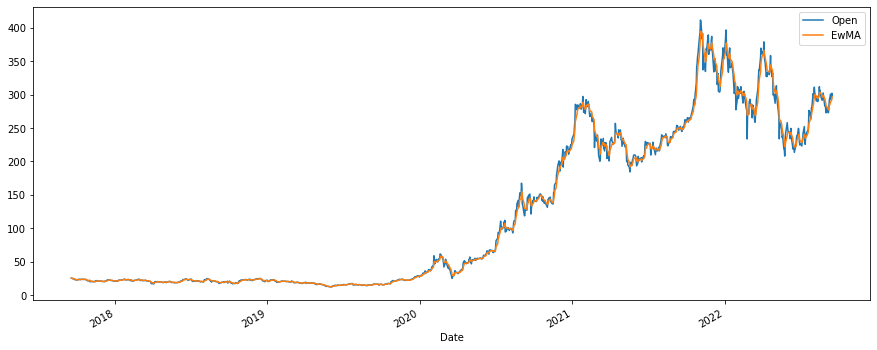

In [37]:
df_tsla[['Open', 'EwMA']].plot(figsize = (15,6))

## ARIMA: 

    AR: Auto Regression       I        MA: Moving Average
                    
                    ARMA model is good for forcasting probabily in sales monthly production

#### for MA, do you use PACF plot or ACF plot ??